In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
geolocations_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv")
geolocations_data.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [4]:
geolocations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [5]:
# How many rows are in the olist_geolocation_dataset?
num_of_rows = geolocations_data.shape[0]
num_of_rows

1000163

In [6]:
# How many unique zip code prefixes are there?
number_of_zip_prefix = geolocations_data["geolocation_zip_code_prefix"].nunique()
number_of_zip_prefix

19015

In [7]:
# How many unique cities are in the dataset?
number_of_cities = geolocations_data["geolocation_city"].nunique()
number_of_cities

8011

In [8]:
# What is the most common state?
state_count = geolocations_data["geolocation_state"].value_counts().sort_values(ascending = False)
state_count.index[0]

'SP'

In [9]:
# What is the most common city in the dataset?
city_count = geolocations_data["geolocation_city"].value_counts()
city_count.index[0]

'sao paulo'

In [10]:
# How many unique combinations of city and state exist?
unique_city_state = geolocations_data[["geolocation_city", "geolocation_state"]].drop_duplicates()
unique_city_state.shape[0]

8463

In [11]:
# Which city has the most zip code prefixes?
city_with_most_zip = (
    geolocations_data.groupby("geolocation_city")["geolocation_zip_code_prefix"]
    .nunique()
    .reset_index(name = "zip_prefix_count")
    .sort_values(by = "zip_prefix_count", ascending = False)
)
city_with_most_zip.head(1)

,geolocation_city,zip_prefix_count
6707,sao paulo,3171


In [12]:
# How many zip code prefixes are there per state?
zip_code_per_state = (
    geolocations_data.groupby("geolocation_state")["geolocation_zip_code_prefix"]
    .nunique()
    .reset_index(name = "zip_prefix_count")
    .sort_values(by = "zip_prefix_count", ascending = False)
)
zip_code_per_state.head(10)

,geolocation_state,zip_prefix_count
25,SP,6349
10,MG,1868
18,RJ,1390
22,RS,1132
17,PR,1046
4,BA,992
8,GO,773
23,SC,620
15,PE,596
5,CE,548


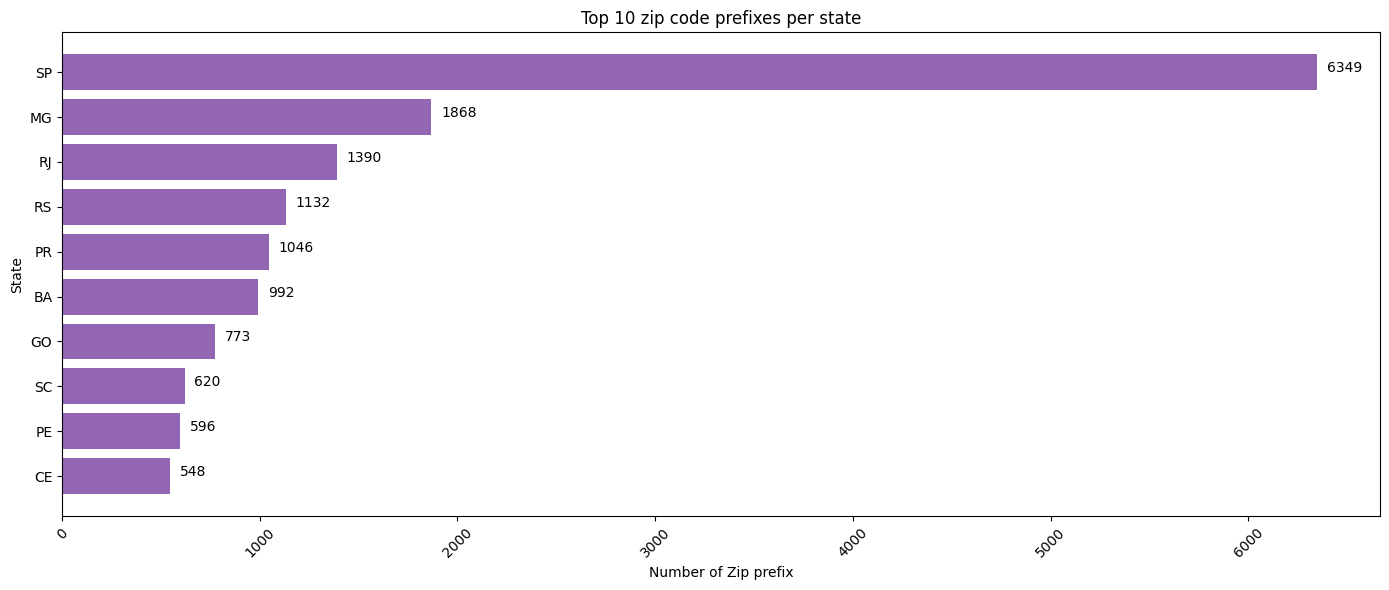

In [13]:
top_10_zip_per_state = zip_code_per_state.head(10).sort_values(by = "zip_prefix_count", ascending = True)
plt.figure(figsize = (14, 6))
plt.barh(
    y = top_10_zip_per_state["geolocation_state"],
    width = top_10_zip_per_state["zip_prefix_count"],
    color = "indigo",
    alpha = 0.6
)
for index, value in enumerate(top_10_zip_per_state["zip_prefix_count"]):
    plt.text(value + 50, index, str(value))
plt.title("Top 10 zip code prefixes per state")
plt.xlabel("Number of Zip prefix")
plt.ylabel("State")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [14]:
# What are the top 5 cities by number of entries?
top_five_cities = geolocations_data["geolocation_city"].value_counts().sort_values(ascending = False).head(5)
top_five_cities

geolocation_city
sao paulo         135800
rio de janeiro     62151
belo horizonte     27805
são paulo          24918
curitiba           16593
Name: count, dtype: int64

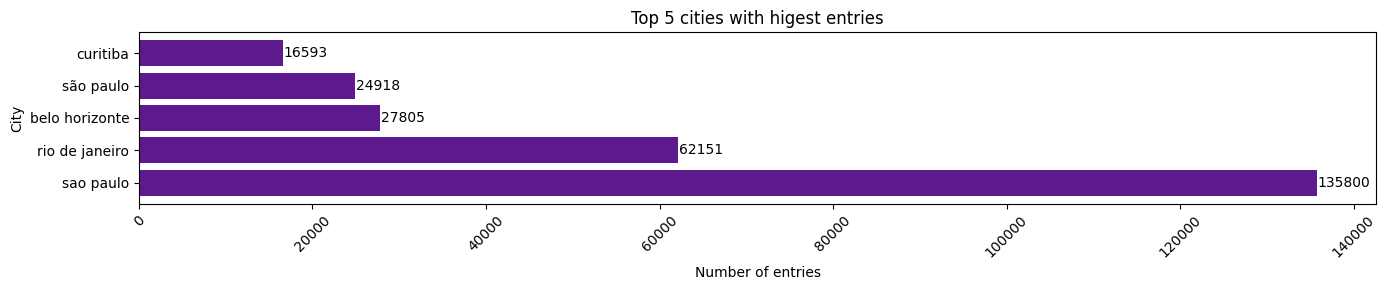

In [15]:
plt.figure(figsize = (14, 3))
plt.barh(
    y = top_five_cities.index,
    width = top_five_cities.values,
    color = "indigo",
    alpha = 0.9
)
for index, value in enumerate(top_five_cities.values):
    plt.text(value + 50, index, str(value), verticalalignment="center")
plt.title("Top 5 cities with higest entries")
plt.xlabel("Number of entries")
plt.ylabel("City")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [16]:
# What is the average latitude and longitude per state?
avg_lat_lng = (
    geolocations_data.groupby("geolocation_state")[["geolocation_lat", "geolocation_lng"]]
    .mean()
    .reset_index()
    .rename(columns = {"geolocation_lat": "avg_latitude", "geolocation_lng": "avg_longitude"})
)
avg_lat_lng.head(10)

,geolocation_state,avg_latitude,avg_longitude
0,AC,-9.702555,-68.451852
1,AL,-9.599729,-36.052017
2,AM,-3.349336,-60.537430
3,AP,0.086025,-51.234304
4,BA,-13.049361,-39.560649
5,CE,-4.363151,-39.004140
6,DF,-15.810885,-47.969630
7,ES,-20.105145,-40.503183
8,GO,-16.577645,-49.334195
9,MA,-3.798997,-44.818627


In [17]:
# Which zip code prefix appears in more than one state?
unique_zips = (
    geolocations_data.groupby("geolocation_zip_code_prefix")["geolocation_state"]
    .nunique()
    .reset_index(name = "state_count")
)
unique_zips_in_multiple_state = unique_zips[unique_zips["state_count"] > 1].sort_values(by = "state_count", ascending = False)
unique_zips_in_multiple_state.head(10)

,geolocation_zip_code_prefix,state_count
367,2116,2
1668,4011,2
6506,21550,2
6696,23056,2
14664,72915,2
15879,78557,2
16146,79750,2
16256,80630,2


In [18]:
# How many zip code prefixes are shared by more than one city?
unique_zips = (
    geolocations_data.groupby("geolocation_zip_code_prefix")["geolocation_city"]
    .nunique()
    .reset_index(name = "city_count")
)
unique_zips_in_multiple_city = unique_zips[unique_zips["city_count"] > 1].sort_values(by = "city_count", ascending = False)
unique_zips_in_multiple_city.head(10)

,geolocation_zip_code_prefix,city_count
15821,78290,5
4986,13318,5
5966,17970,5
5067,13457,5
10239,42850,5
5064,13454,5
3443,6900,5
7726,28950,5
5065,13455,5
14399,71693,4


In [19]:
# Find all cities that span more than 5 zip code prefixes.
unique_zips = (
    geolocations_data.groupby("geolocation_city")["geolocation_zip_code_prefix"]
    .nunique()
    .reset_index(name = "zip_count")
)
cities_has_more_than_five_zips = unique_zips[unique_zips["zip_count"] > 5].sort_values(by = "zip_count", ascending = False)
cities_has_more_than_five_zips.head(10)

,geolocation_city,zip_count
6707,sao paulo,3171
7253,são paulo,3013
1035,brasilia,496
1046,brasília,406
5874,rio de janeiro,404
6046,salvador,275
2684,goiania,233
2700,goiânia,210
835,belo horizonte,205
2554,fortaleza,172


In [20]:
# Identify states where a single city takes up more than 50% of the zip code prefixes.
state_city_zip_count = (
    geolocations_data.groupby(["geolocation_state", "geolocation_city"])["geolocation_zip_code_prefix"]
    .nunique()
    .reset_index(name = "state_city_zip_count")
)

zip_code_per_state = (
    geolocations_data.groupby("geolocation_state")["geolocation_zip_code_prefix"]
    .nunique()
    .reset_index(name = "state_zip_count")
    .sort_values(by = "state_zip_count", ascending = False)
)

merged = pd.merge(
    state_city_zip_count,
    zip_code_per_state,
    on = "geolocation_state"
)
merged["zip_pct"] = merged["state_city_zip_count"] / merged["state_zip_count"]
merged = merged[merged["zip_pct"] > 0.5].sort_values(by = "zip_pct", ascending = False)
merged.head(10)

,geolocation_state,geolocation_city,state_city_zip_count,state_zip_count,zip_pct
1167,DF,brasilia,496,516,0.961240
1168,DF,brasília,406,516,0.786822
6022,RR,boa vista,17,28,0.607143
208,AM,manaus,73,144,0.506944


In [21]:
# Find the top 3 cities per state by number of distinct zip code prefixes.
state_city_zip_count = (
    geolocations_data.groupby(["geolocation_state", "geolocation_city"])["geolocation_zip_code_prefix"]
    .nunique()
    .reset_index(name = "state_city_zip_count")
)

state_city_zip_count = state_city_zip_count.sort_values(["geolocation_state", "state_city_zip_count"], ascending = [True, False])
state_city_zip_count["city_rank"] = state_city_zip_count.groupby("geolocation_state").cumcount() + 1
state_city_zip_count_top_3 = state_city_zip_count[state_city_zip_count["city_rank"] <= 3]
state_city_zip_count_top_3.head(10)

,geolocation_state,geolocation_city,state_city_zip_count,city_rank
24,AC,rio branco,21,1
21,AC,porto acre,2,2
25,AC,rio de janeiro,2,3
87,AL,maceio,45,1
88,AL,maceió,42,2
36,AL,arapiraca,18,3
208,AM,manaus,73,1
233,AM,tefe,6,2
198,AM,itacoatiara,4,3
245,AP,macapa,11,1


In [22]:
# Are there zip code prefixes used in more than one city and state? List them.
zip_city_state = (
    geolocations_data.groupby("geolocation_zip_code_prefix")[["geolocation_state", "geolocation_city"]]
    .nunique()
)
zip_city_state_used_more_than_one = zip_city_state[(zip_city_state["geolocation_state"] > 1) & (zip_city_state["geolocation_city"] > 1)]
zip_city_state_used_more_than_one.head(10)

,geolocation_state,geolocation_city
geolocation_zip_code_prefix,,
2116,2,2
4011,2,2
72915,2,3
78557,2,2
80630,2,2


In [23]:
# Find the geographic center (avg lat/lng) of each state.
avg_lat_lng_per_state = (
    geolocations_data.groupby("geolocation_state")[["geolocation_lat", "geolocation_lng"]]
    .mean()
    .reset_index()
    .rename(columns = {"geolocation_lat": "avg_latitude", "geolocation_lng": "avg_longitude"})
)
avg_lat_lng_per_state.head(10)

,geolocation_state,avg_latitude,avg_longitude
0,AC,-9.702555,-68.451852
1,AL,-9.599729,-36.052017
2,AM,-3.349336,-60.537430
3,AP,0.086025,-51.234304
4,BA,-13.049361,-39.560649
5,CE,-4.363151,-39.004140
6,DF,-15.810885,-47.969630
7,ES,-20.105145,-40.503183
8,GO,-16.577645,-49.334195
9,MA,-3.798997,-44.818627


In [24]:
# Cluster zip codes (prefixes) by proximity using lat/lng rounding (e.g., round to 1 decimal place).
geo_data = geolocations_data.copy()
geo_data["lat_cluster"] = geo_data["geolocation_lat"].round(1)
geo_data["lng_cluster"] = geo_data["geolocation_lng"].round(2)

zip_prefix_count = (
    geo_data.groupby(["lat_cluster", "lng_cluster"])["geolocation_zip_code_prefix"]
    .nunique()
    .reset_index(name = "zip_count")
)

zip_prefix_count["total_points"] = (
    geo_data.groupby(["lat_cluster", "lng_cluster"])
    .size()
    .values
)

zip_prefix_count.head(10)

,lat_cluster,lng_cluster,zip_count,total_points
0,-36.6,-64.29,1,2
1,-36.6,-64.28,1,1
2,-34.6,-58.90,1,1
3,-34.6,-58.73,1,1
4,-33.7,-53.48,1,10
5,-33.7,-53.47,1,1
6,-33.7,-53.46,1,28
7,-33.7,-53.45,1,21
8,-33.7,-53.27,1,2
9,-33.7,-53.26,1,1
